In [1]:
import check_pmasks as cp
import matplotlib.pyplot as plt
import numpy as np
from AnalysisBackend.hdf5 import modecoupling_hdf5 as mode
from AnalysisBackend.hdf5 import window_hdf5
from AnalysisBackend.powerspectrum import psestimator
from AnalysisBackend.hdf5 import maps2pseudospectra_hdf5 as lib
from AnalysisBackend.mapping import maprep
from AnalysisBackend.mapping import polwindow
import glob

## Generate all pmasks

In [3]:
# Generate all pmasks
patches = ['pb1ra12hab_3x3', 'pb1ra23hab_3x3', 'pb1lst4p5_3x3']
sources = ['PB1RA12HAB', 'PB1RA23HAB', 'PB1LST4p5']
pweight_days = {}
pmask_days = {}
pmask_coadds = {}

for patch, source in zip(patches, sources):
    path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
    pmask_coadds[patch] = cp.make_pmask(path_coadd, source)
    pmask_days[patch], pweight_days[patch] = [], []
    for day in cp.patch_days_list(patch):
        path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)
        pmask_days[patch].append(cp.make_pmask(path_day, source))
        pweight_days[patch].append(cp.get_pweight(path_day))

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask


In [46]:
mask_cut = 0.1

# Coadd masks with taper
patches = ['pb1ra12hab_3x3', 'pb1ra23hab_3x3', 'pb1lst4p5_3x3']
sources = ['PB1RA12HAB', 'PB1RA23HAB', 'PB1LST4p5']
pmask_coadds = {}

for patch, source in zip(patches, sources):
    path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
    pmask_coadds[patch] = cp.make_pmask(path_coadd, source, mask_cut = mask_cut)

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 10 fixed sources


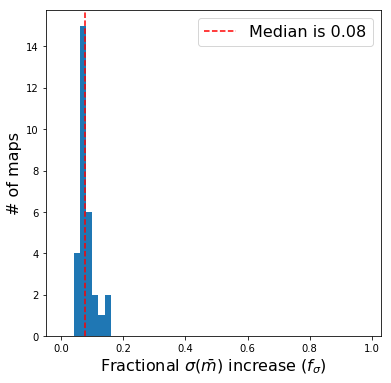

In [65]:
patches = ['pb1ra12hab_3x3', 'pb1ra23hab_3x3', 'pb1lst4p5_3x3']
sources = ['PB1RA12HAB', 'PB1RA23HAB', 'PB1LST4p5']
window=0

frac_vars = []
bad_idx = 0
for patch, source in zip(patches, sources):
    for pmask_day, pweight_day in zip(pmask_days[patch], pweight_days[patch]):
        frac_var, frac_var_pixel = cp.compute_fractional_var_increase(pmask_coadds[patch], pmask_day, pweight_day, window=window)
        if frac_var > 1:
            bad_idx += 1
        frac_vars.append(frac_var)

stds = np.sqrt(1+np.array(frac_vars))-1

plt.figure(figsize=(6,6))
plt.hist(stds, bins=np.arange(0,1,0.02))
plt.ylabel("# of maps", fontsize=16)
plt.xlabel(r"Fractional $\sigma(\bar{m})$ increase ($f_{\sigma}$)", fontsize=16)
plt.axvline(np.median(stds), linestyle='--', c='r', label="Median is {}".format(round(np.median(stds),2)))
plt.legend(fontsize=16)
plt.show()

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
frac var is 0.176410659135


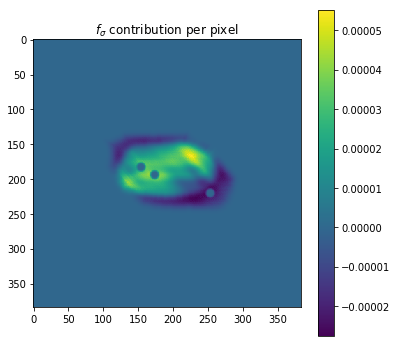

Text(0,0.5,'Q (uK)')

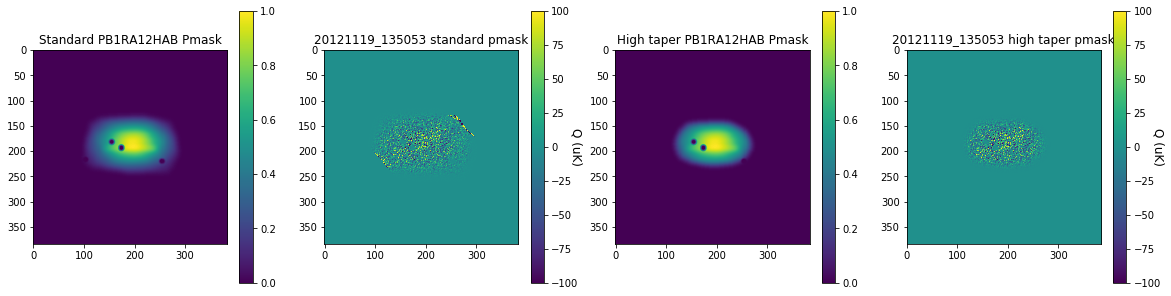

In [48]:
mask_cut = 0.1
# source = 'PB1LST4p5'
# patch = 'pb1lst4p5_3x3'
# day = cp.patch_days_list(patch)[-109]
source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = cp.patch_days_list(patch)[4]
path_coadd = "/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim000.hdf5".format(patch,day)

pweight_day = cp.get_pweight(path_day)
pmask_day = cp.make_pmask(path_day, source)
pmask_coadd = cp.make_pmask(path_coadd, source)
pmask_taper = cp.make_pmask(path_coadd, source, mask_cut=mask_cut)
I_coadd, Q_day, U_day = cp.make_padded_map(path_day, source)
frac_var, frac_var_pixel = cp.compute_fractional_var_increase(pmask_taper, pmask_day, pweight_day)
frac_sig_pixel = np.sqrt(np.array(frac_var_pixel)+1)-1

print("frac var is {}".format(frac_var))
plt.figure(figsize=(6,6))
plt.imshow(frac_sig_pixel)
cbar = plt.colorbar()
plt.title(r"$f_{\sigma}$ contribution per pixel", fontsize=12)
plt.show()

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax0.set_title("Standard {} Pmask".format(source))
im0 = ax0.imshow(pmask_coadd)
fig.colorbar(im0, ax=ax0)

ax1.set_title("{} standard pmask".format(day))
im1 = ax1.imshow(Q_day*pmask_coadd*10**6, vmin=-100, vmax=100)
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.ax.set_ylabel("Q (uK)", rotation=270, fontsize=12)

ax2.set_title("High taper {} Pmask".format(source))
im2 = ax2.imshow(pmask_taper)
fig.colorbar(im2, ax=ax2)

ax3.set_title("{} high taper pmask".format(day))
im3 = ax3.imshow(Q_day*pmask_taper*10**6, vmin=-100, vmax=100)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar3.ax.set_ylabel("Q (uK)", rotation=270, fontsize=12)

# Test variance equations

In [14]:
true_var = 2
maps = np.random.normal(loc=0, scale=np.sqrt(true_var), size=(15000, 100))
w1 = np.random.random(size=100)
w2 = np.concatenate((np.zeros(50), np.ones(50)))
N1 = np.sum(w1)
N2 = np.sum(w2)
w1maps = []
w2maps = []
for m in maps:
    w1maps.append(w1*m)
    w2maps.append(w2*m)
    
m1s = [np.sum(wm)/N1 for wm in w1maps]
m2s = [np.sum(wm)/N2 for wm in w2maps]
print("mean(m1) actual variance is {}".format(np.var(m1s)))
print("mean(m2) actual variance is {}".format(np.var(m2s)))
print("Actual variance increase is {}".format(np.var(m2s)/np.var(m1s)-1))

# Theory
N1 = np.sum(w1)
N2 = np.sum(w2)
var1 = np.sum(w1**2*true_var)/N1**2
var2 = np.sum(w2**2*true_var)/N2**2
print("Theoretical var1 is {}".format(var1))
print("Theoretical var2 is {}".format(var2))
print("Theoretical fractional variance increase is {}".format(var2/var1-1))

mean(m1) actual variance is 0.0287935947321
mean(m2) actual variance is 0.0408396358667
Actual variance increase is 0.41835836222
Theoretical var1 is 0.0284272638867
Theoretical var2 is 0.04
Theoretical fractional variance increase is 0.407099893942


### With actual maps

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 10 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 10 fixed sources


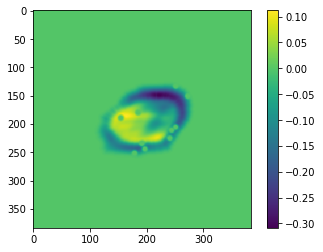

Frac var is 0.18734138904


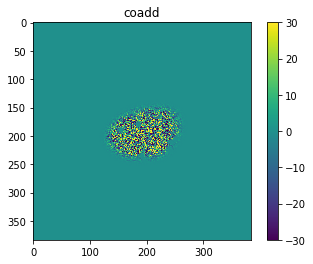

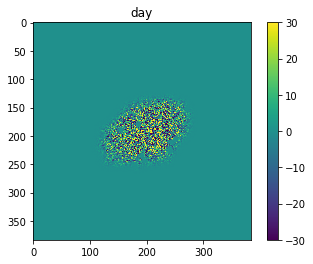

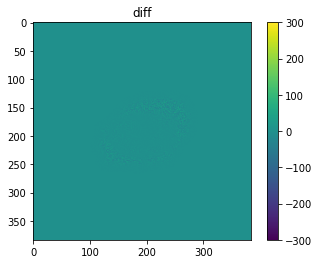

Coadd var is 0.0883727921069
Day var is 0.0736228756454
var frac is 1.2003442046


In [44]:
mask_cut = 0.1
window = 0
day_idx = 10

patch = 'pb1lst4p5_3x3'
source = 'PB1LST4p5'
day = cp.patch_days_list(patch)[day_idx]
path_day = "/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim000.hdf5".format(patch, day)
path_coadd = "/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/coadd/sim000.hdf5".format(patch)

pmask_day = cp.make_pmask(path_day, source)
pmask_coadd = cp.make_pmask(path_coadd, source, window=window, mask_cut=mask_cut)

plt.figure()
plt.imshow(pmask_coadd-pmask_day)
plt.colorbar()
plt.show()

pweight = cp.get_pweight(path_day)
frac_var, _ = cp.compute_fractional_var_increase(pmask_coadd, pmask_day, pweight, window=False)
print("Frac var is {}".format(frac_var))

Q_coadd_avg = []
Q_day_avg = []
for hdf5 in glob.glob("/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim*".format(patch, day))[:500]:
    I, Q, U = cp.make_padded_map(hdf5, source)
    Q_coadd_avg.append(10**6*np.sum(pmask_coadd*np.abs(Q))/np.sum(pmask_coadd))
    Q_day_avg.append(10**6*np.sum(pmask_day*np.abs(Q))/np.sum(pmask_day))

plt.figure()
plt.imshow(pmask_coadd*Q*10**6, vmin = -30, vmax=30)
plt.colorbar()
plt.title('coadd')
plt.show()

plt.figure()
plt.imshow(pmask_day*Q*10**6, vmin = -30, vmax=30)
plt.colorbar()
plt.title('day')
plt.show()

plt.figure()
plt.imshow(pmask_day*Q*10**6-pmask_coadd*Q*10**6, vmin = -300, vmax=300)
plt.colorbar()
plt.title('diff')
plt.show()
    
print("Coadd var is {}".format(np.var(Q_coadd_avg)))
print("Day var is {}".format(np.var(Q_day_avg)))
print("var frac is {}".format(np.var(Q_coadd_avg)/np.var(Q_day_avg)))

In [20]:
10**6*np.sum(pmask_day*Q)

-128.83768292170166

In [21]:
10**6*np.sum(pmask_coadd*Q)

23.59343098041076

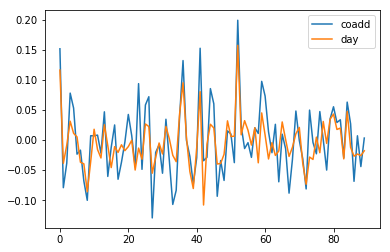

In [22]:
plt.plot(Q_coadd_avg[:100], label='coadd')
plt.plot(Q_day_avg[:100], label='day')
plt.legend()

In [5]:
np.sum(pmask_day)

7229.860737592934

In [10]:
10**6*np.sum(pmask_coadd*Q)/np.sum(pmask_coadd)

0.04369720885226823

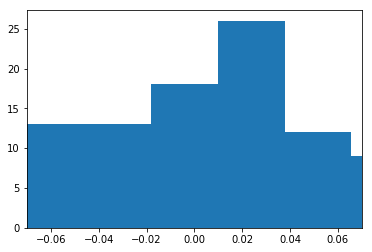

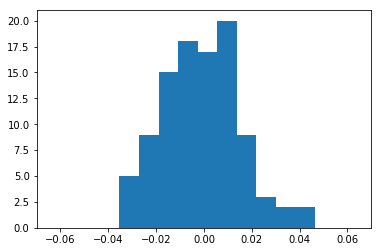

In [8]:
plt.figure()
plt.hist(np.array(Q_coadd_avg)*10**6)
plt.xlim(-0.07, 0.07)
plt.show()

plt.figure()
plt.hist(np.array(Q_day_avg)*10**6)
plt.xlim(-0.07, 0.07)
plt.show()

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources


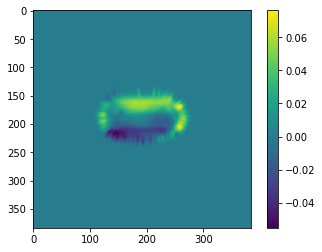

0.16971746985953895
3.4761431779898932e-15
3.347704882825225e-15
0.9630514945477768


In [74]:
mask_cut = 0.1
day_idx = 3

source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = cp.patch_days_list(patch)[day_idx]
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)
day_pmask =  cp.make_pmask(path_day, source, mask_cut)
coadd_pmask = cp.make_pmask(path_coadd, source, mask_cut)

plt.figure()
plt.imshow(coadd_pmask-day_pmask)
plt.colorbar()
plt.show()

# Q_day_avg = []
# Q_coadd_avg = []
# for hdf5 in glob.glob("/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim*".format(patch, day)):
#     I, Q, U= cp.make_padded_map(hdf5, source)
#     Q_day_avg.append(np.sum(day_pmask*Q)/np.sum(day_pmask))
#     Q_coadd_avg.append(np.sum(coadd_pmask*Q)/np.sum(coadd_pmask))

print(frac_vars[day_idx])
print(np.var(Q_day_avg))
print(np.var(Q_coadd_avg))
print(np.var(Q_coadd_avg)/np.var(Q_day_avg))

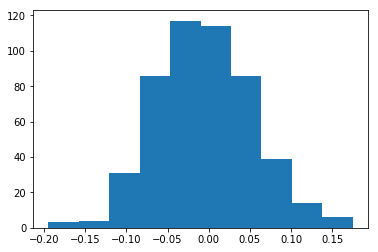

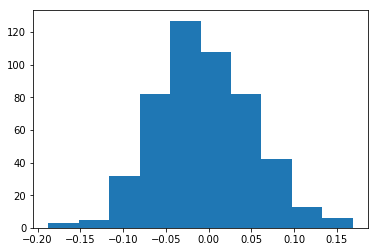

In [75]:
plt.hist(np.array(Q_day_avg)*10**6)
plt.show()

plt.hist(np.array(Q_coadd_avg)*10**6)
plt.show()

In [2]:
np.sum(coadd_pmask*Q)

NameError: name 'coadd_pmask' is not defined

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources


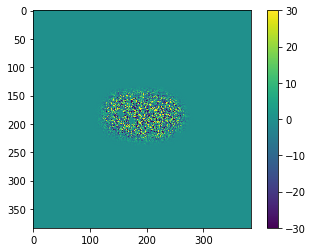

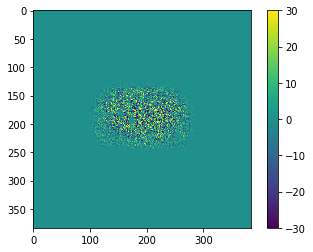

In [70]:
mask_cut = 0.1

source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = cp.patch_days_list(patch)[2]
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)

pmask_coadd = cp.make_pmask(path_coadd, source, mask_cut)
pmask_day = cp.make_pmask(path_day, source)
I, Q, U = cp.make_padded_map("/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim000.hdf5".format(patch, day), source)

plt.figure()
plt.imshow(Q*pmask_coadd*10**6, vmin=-30, vmax=30)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Q*pmask_day*10**6, vmin=-30, vmax=30)
plt.colorbar()
plt.show()

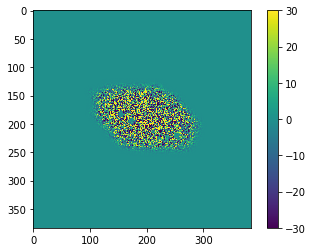

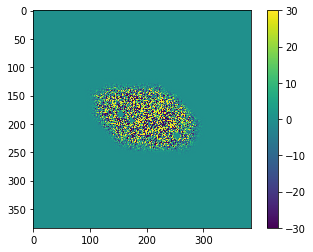

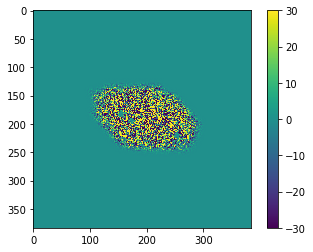

In [20]:
I, Q, U = cp.make_padded_map("/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim000.hdf5".format(patch, day), source)
I, Q10, U = cp.make_padded_map("/global/cscratch1/sd/chinoney/share/2020-09-09/gaussian_sim/{}/sim_signal_and_noise/{}/coadd/sim010.hdf5".format(patch, day), source)

plt.figure()
plt.imshow(Q10*day_pmask*10**6, vmin=-30, vmax=30)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Q*day_pmask*10**6, vmin=-30, vmax=30)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Q*day_pmask*10**6-Q10*day_pmask*10**6, vmin=-30, vmax=30)
plt.colorbar()
plt.show()

In [21]:
print(np.sum(day_pmask*Q10)/np.sum(day_pmask))
print(np.sum(day_pmask*Q)/np.sum(day_pmask))

3.530522350740289e-08
-7.688942116622175e-08


sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources


Text(0,0.5,'uK')

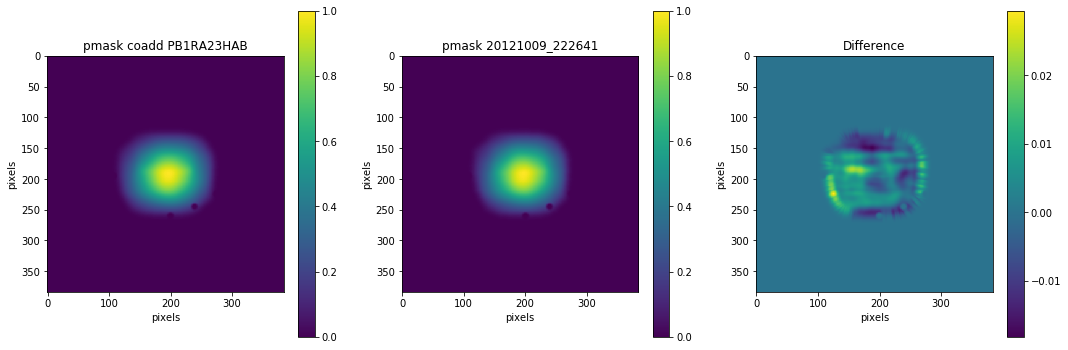

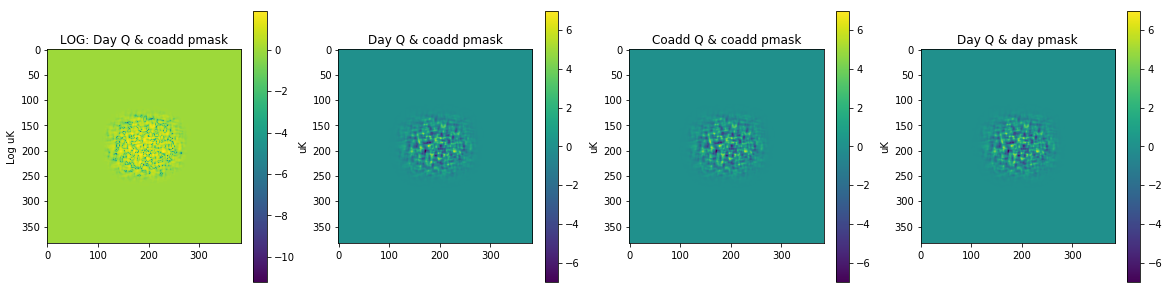

In [60]:
source = 'PB1RA23HAB'
patch = 'pb1ra23hab_3x3'
day = cp.patch_days_list(patch)[2]
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)
output_file = 'outputs/check_pmasks/pmask_{}_{}'.format(source, day)

cp.pmasks_plot_diff(path_coadd, path_day, source, day, output_file)

pmask_coadd = cp.make_pmask(path_coadd, source)
pmask_day = cp.make_pmask(path_day, source)
I_coadd, Q_coadd, U_coadd = cp.make_padded_map(path_coadd, source)
I_coadd, Q_day, U_day = cp.make_padded_map(path_day, source)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax0.set_title("LOG: Day Q & coadd pmask")
im0 = ax0.imshow(np.log(np.abs(Q_day*pmask_coadd*10**6+1)))
fig.colorbar(im0, ax=ax0)
ax0.set_ylabel("Log uK")

ax1.set_title("Day Q & coadd pmask")
im1 = ax1.imshow(Q_day*pmask_coadd*10**6, vmin=-7, vmax=7)
fig.colorbar(im1, ax=ax1)
ax1.set_ylabel("uK")

ax2.set_title("Coadd Q & coadd pmask")
im2 = ax2.imshow(Q_coadd*pmask_coadd*10**6, vmin=-7, vmax=7)
fig.colorbar(im2, ax=ax2)
ax2.set_ylabel("uK")

ax3.set_title("Day Q & day pmask")
im3 = ax3.imshow(Q_day*pmask_day*10**6, vmin=-7, vmax=7)
fig.colorbar(im3, ax=ax3)
ax3.set_ylabel("uK")


# Check coadd mask applied to day

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources


Text(0,0.5,'uK')

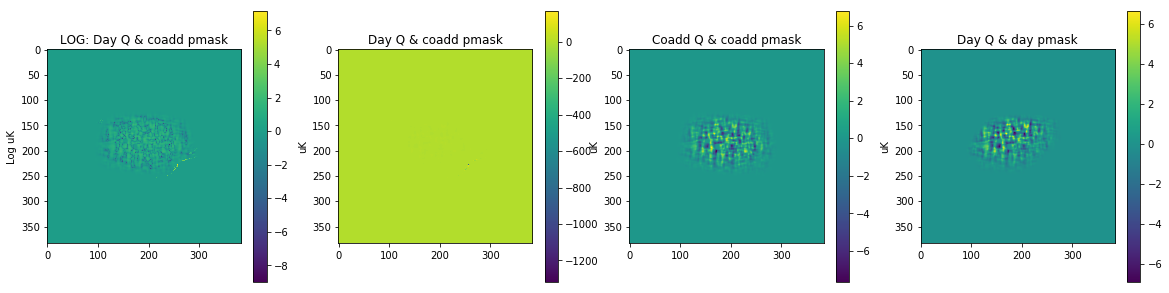

In [17]:
source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = '20121126_084325'
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)

pmask_coadd = cp.make_pmask(path_coadd, source)
pmask_day = cp.make_pmask(path_day, source)
I_coadd, Q_coadd, U_coadd = cp.make_padded_map(path_coadd, source)
I_coadd, Q_day, U_day = cp.make_padded_map(path_day, source)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax0.set_title("LOG: Day Q & coadd pmask")
im0 = ax0.imshow(np.log(np.abs(Q_day*pmask_coadd*10**6+1)))
fig.colorbar(im0, ax=ax0)
ax0.set_ylabel("Log uK")

ax1.set_title("Day Q & coadd pmask")
im1 = ax1.imshow(Q_day*pmask_coadd*10**6)
fig.colorbar(im1, ax=ax1)
ax1.set_ylabel("uK")

ax3.set_title("Day Q & day pmask")
im3 = ax3.imshow(Q_day*pmask_day*10**6)
fig.colorbar(im3, ax=ax3)
ax3.set_ylabel("uK")


ax2.set_title("Coadd Q & coadd pmask")
im2 = ax2.imshow(Q_coadd*pmask_coadd*10**6)
fig.colorbar(im2, ax=ax2)
ax2.set_ylabel("uK")


# Check weights

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources


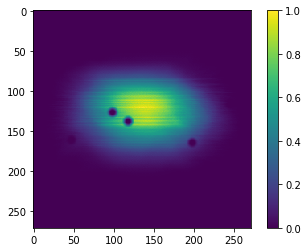

In [20]:
source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = cp.patch_days_list(patch)[1]
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)

m,tweight,pweight = mode.prepare_map(path_day,source)
mask = (pweight/np.max(pweight)) if np.max(pweight) > 0. else np.zeros_like(pweight)
ps = window_hdf5.pointsource_mask(m)
pixel_size = m.mapinfo.pixel_size
edge_taper = 1.0*(np.pi/180.0)
pixel_taper = int(edge_taper / pixel_size)
# mask = psestimator.prepare_polmask(mask,pixel_taper)
mask *= ps
    
plt.imshow(mask)
plt.colorbar()


sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources


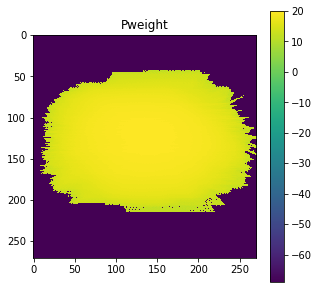

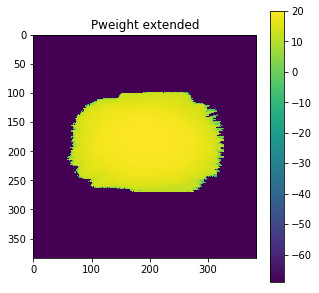

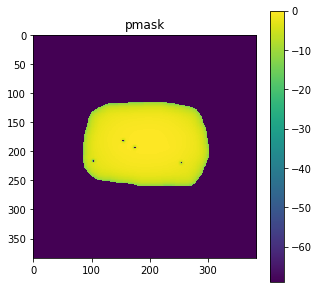

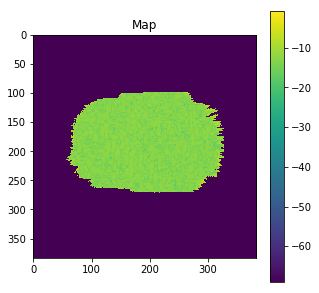

In [2]:
source = 'PB1RA12HAB'
patch = 'pb1ra12hab_3x3'
day = cp.patch_days_list(patch)[1]
path_coadd = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/sim000.hdf5".format(patch)
path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)

I_coadd, Q_day, U_day = cp.make_padded_map(path_day, source)

#Pweight
# m = maprep.MapMakingVectors.load(path_day)
# cc = m.mapinfo.view2d(m.cc)
# cs = m.mapinfo.view2d(m.cs)
# ss = m.mapinfo.view2d(m.ss)
# cn = m.condnum()
# window_hdf5.denan(cn)
# cn = m.mapinfo.view2d(cn)
# pweight = polwindow.qu_weight_mineig(cc,cs,ss)

m,tweight,pweight = mode.prepare_map(path_day,source)
pweight_ext = cp.get_pweight(path_day)
pmask = cp.make_pmask(path_coadd, source)

plt.figure(figsize=(5,5))
plt.imshow(np.log(np.abs(pweight+1e-30)))
plt.title("Pweight")
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log(np.abs(pweight_ext+1e-30)))
plt.title("Pweight extended")
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log(np.abs(pmask+1e-30)))
plt.title("pmask")
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log(np.abs(Q_day+1e-30)))
plt.title("Map")
plt.colorbar()
plt.show()

# Transients

In [ ]:
transients = {}
transients['pb1ra12hab_3x3'] = ['20120703_223638', '20120702_225209', '20120701_183902', '20120630_210156', '20120629_220910', '20120628_185048']

In [144]:
# Generate all pmask day plots
patches = ['pb1ra12hab_3x3', 'pb1ra23hab_3x3', 'pb1lst4p5_3x3']
sources = ['PB1RA12HAB', 'PB1RA23HAB', 'PB1LST4p5']


for patch, source in zip(patches, sources):
    for day in cp.patch_days_list(patch):
        path_day = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/{}/coadd/sim000.hdf5".format(patch,day)
        pmask = cp.make_pmask(path_day, source)
        plt.figure(figsize=(6,6))
        plt.imshow(pmask)
        plt.colorbar()
        plt.title("{} {}".format(day, patch))
        plt.savefig("outputs/pmask_{}_{}".format(patch, day))
        plt.close()

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 5 fixed sources
sources.fixed_sources_for_small_patches is used for fixed-source mask
